In [2]:
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv

load_dotenv()
model = ChatOpenAI(model="gpt-4o-mini")

In [3]:
from typing import TypedDict, Annotated
from langgraph.graph.message import add_messages
from langgraph.graph import MessagesState
from langchain_core.messages import SystemMessage, HumanMessage, RemoveMessage

class MyState(MessagesState):
    #messages: Annotated[list,add_messages]
    summary: str


In [4]:
def call_model(state:MyState):
    summary= state.get('summary','')

    if summary:
        messages = [SystemMessage(content=f"Summary of conversation earlier: {summary}")] +state['messages']

    else:
        messages = state['messages']

    response = model.invoke(messages)

    return {"messages": [response]}

    
        

In [7]:
mylist=  [1,2,3,4,5,6,7,8,9,10]
mylist[:-2]

[1, 2, 3, 4, 5, 6, 7, 8]

In [ ]:
def summarize_conversation(state: MyState):
    summary = state.get("summary", "")

    if summary:
        # A summary already exists
        summary_message = (
            f"This is summary of the conversation to date: {summary}\n\n"
            "Extend the summary by taking into account the new messages above:"
        )
    else:
        summary_message = "Create a summary of the conversation above:"


    messages = state["messages"][:-2] + [HumanMessage(content=summary_message)]
    response = model.invoke(messages)

    messages_tobe_deleted=  [ RemoveMessage(id= message.id) for message in state['messages'][:-2]]

    return {"summary": response.content, "messages": messages_tobe_deleted  }

In [9]:
from langgraph.graph import END

# Determine whether to end or summarize the conversation
def should_continue(state: MyState):
    """Return the next node to execute."""
    messages = state['messages']
    
    # If there are more than six messages, then we summarize the conversation
    if len(messages) >= 6:
        return "summarize_conversation"
    
    # Otherwise we can just end
    return "end"

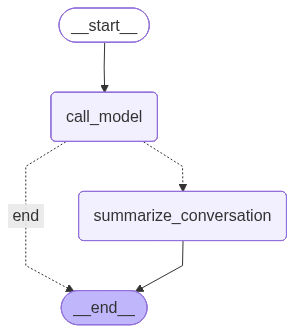

In [11]:
from IPython.display import Image, display
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import StateGraph, START, END

# Define a new graph
workflow = StateGraph(MyState)
workflow.add_node("call_model", call_model)
workflow.add_node("summarize_conversation", summarize_conversation)
workflow.add_edge(START, "call_model")
workflow.add_conditional_edges("call_model",should_continue,{
    "summarize_conversation": "summarize_conversation",
    "end": END
})

graph= workflow.compile(checkpointer= MemorySaver())
graph

In [12]:
config = {"configurable": {"thread_id": "1"}}

input_message = HumanMessage(content="hi! I'm Siva")

output = graph.invoke({"messages": [input_message]}, config)
output

{'messages': [HumanMessage(content="hi! I'm Siva", additional_kwargs={}, response_metadata={}, id='2642f463-fb4a-48ff-a330-8c2eac7ce838'),
  AIMessage(content='Hi Siva! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 12, 'total_tokens': 23, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_c4585b5b9c', 'id': 'chatcmpl-CxosUN3pU8ahCYRc9wwIl2tcEClBX', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019bbb3d-fc85-7b60-bba0-9c3170974c55-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 12, 'output_tokens': 11, 'total_tokens': 23, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_t

In [13]:
input_message = HumanMessage(content=" what is my name")

output = graph.invoke({"messages": [input_message]}, config)
output

{'messages': [HumanMessage(content="hi! I'm Siva", additional_kwargs={}, response_metadata={}, id='2642f463-fb4a-48ff-a330-8c2eac7ce838'),
  AIMessage(content='Hi Siva! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 12, 'total_tokens': 23, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_c4585b5b9c', 'id': 'chatcmpl-CxosUN3pU8ahCYRc9wwIl2tcEClBX', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019bbb3d-fc85-7b60-bba0-9c3170974c55-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 12, 'output_tokens': 11, 'total_tokens': 23, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_t

In [14]:
input_message = HumanMessage(content=" i love python")

output = graph.invoke({"messages": [input_message]}, config)
output

{'messages': [HumanMessage(content=' i love python', additional_kwargs={}, response_metadata={}, id='ef1ebd15-cc65-4f75-84ef-ce5859c5143b'),
  AIMessage(content="That's great to hear! Python is a versatile and powerful programming language. What do you enjoy most about it? Are you working on any projects or looking to learn something specific?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 35, 'prompt_tokens': 59, 'total_tokens': 94, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_c4585b5b9c', 'id': 'chatcmpl-CxotjU5NQUH8RTn8k7bnNLkaJnnCm', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019bbb3f-28fd-7861-8690-93672bab3d0d-0', tool_calls=[], invalid_tool_c

In [15]:
input_message = HumanMessage(content=" i love JavaScript too")

output = graph.invoke({"messages": [input_message]}, config)
output

{'messages': [HumanMessage(content=' i love python', additional_kwargs={}, response_metadata={}, id='ef1ebd15-cc65-4f75-84ef-ce5859c5143b'),
  AIMessage(content="That's great to hear! Python is a versatile and powerful programming language. What do you enjoy most about it? Are you working on any projects or looking to learn something specific?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 35, 'prompt_tokens': 59, 'total_tokens': 94, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_c4585b5b9c', 'id': 'chatcmpl-CxotjU5NQUH8RTn8k7bnNLkaJnnCm', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019bbb3f-28fd-7861-8690-93672bab3d0d-0', tool_calls=[], invalid_tool_c

In [16]:
input_message = HumanMessage(content=" i love Langgraph")

output = graph.invoke({"messages": [input_message]}, config)
output

{'messages': [HumanMessage(content=' i love Langgraph', additional_kwargs={}, response_metadata={}, id='a92d20d2-8544-4267-a21e-f4046205b5c4'),
  AIMessage(content="That's interesting! Langgraph is a powerful tool for visualizing language models and understanding their behavior. What do you like most about Langgraph? Are you using it for a particular project or to explore certain aspects of language models?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 45, 'prompt_tokens': 174, 'total_tokens': 219, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_29330a9688', 'id': 'chatcmpl-CxovEPA3H9lpc8Hb08aKPO6C2RgcI', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019